## Preprocessing

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_excel('IDataset2.xlsx')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Encoding categorical data
# Encoding the Independent Variable
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])],
                       remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 71)

[[0.0 1.0 0.5 1.0]
 [0.0 1.0 0.5 1.5]
 [0.0 1.0 0.5 2.5]
 ...
 [1.0 0.0 25.0 2.5]
 [1.0 0.0 25.0 3.5]
 [1.0 0.0 25.0 4.5]]


## Calling the Random Forest Regressor

In [2]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(random_state = 71)

## Applying Grid Search to find the best model and the best parameters

In [3]:
from sklearn.model_selection import GridSearchCV
parameters = [{'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
               'min_samples_split': [2, 3, 4],
               'min_samples_leaf': [1, 2, 3, 4],
               'n_estimators' : [5, 10, 25, 50, 100, 200]}]
grid_search = GridSearchCV(estimator = regressor,
                           param_grid = parameters,
                           scoring = 'r2',
                           cv = 5,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy:", best_accuracy)
print("Best Parameters:", best_parameters)

Best Accuracy: 0.9882167299512288
Best Parameters: {'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


## Training the Decision Tree Regression model on the Training set

In [4]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100,
                                  max_depth = 12,
                                  min_samples_leaf = 1,
                                  min_samples_split = 2,
                                  random_state = 71)
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=12, random_state=71)

In [5]:
results_df = pd.DataFrame(grid_search.cv_results_)

from pathlib import Path
filepath1 = Path.cwd().parent
filepath2 = Path(filepath1/'Results/1D_RF_Hyperparameter/rf_impulse_hyperparameter.csv')  
filepath2.parent.mkdir(parents=True, exist_ok=True)
results_df.to_csv(filepath2)

## Create a KFold object with 5 splits 

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
folds = KFold(n_splits = 5, shuffle = False)
scores = cross_val_score(regressor, X_train, y_train, scoring='r2', cv=folds)
print (scores)
print (scores.mean())
regressor

## Predicting the Test set results

In [6]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
file = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
print(file)

[[ 56.67  56.27]
 [296.14 275.19]
 [151.95 154.01]
 [134.47 124.13]
 [ 31.29  31.91]
 [237.42 250.9 ]
 [318.06 318.08]
 [127.32 130.63]
 [ 21.6   22.28]
 [292.53 308.69]
 [191.42 196.47]
 [ 58.61  59.91]
 [191.24 190.41]
 [204.8  190.47]
 [ 30.94  31.12]
 [ 57.15  55.82]
 [ 48.16  49.08]
 [145.93 149.83]
 [ 59.86  60.27]
 [ 26.11  26.35]
 [195.27 196.5 ]
 [355.88 342.16]
 [ 18.69  17.94]
 [ 81.66  77.99]
 [ 27.84  28.83]
 [ 79.78  74.98]
 [ 68.89  69.37]
 [169.33 163.26]
 [ 25.62  25.93]
 [ 82.08  79.01]
 [  6.37   5.86]
 [389.41 382.46]
 [ 72.63  72.  ]
 [ 91.64  78.38]
 [317.76 341.12]
 [ 70.16  67.81]
 [275.58 269.19]
 [ 61.53  57.54]
 [ 99.57  97.47]
 [ 47.71  46.24]
 [188.33 188.94]
 [152.75 155.25]
 [401.83 435.33]
 [246.24 245.91]
 [ 66.81  71.43]
 [ 66.58  64.68]
 [ 37.83  39.6 ]
 [ 41.8   40.54]
 [185.68 191.8 ]
 [118.58 122.11]
 [105.39 107.37]
 [154.11 158.34]
 [ 67.19  68.52]
 [ 43.92  41.68]
 [ 35.73  33.88]
 [ 73.    70.19]
 [378.59 366.96]
 [ 55.67  53.66]
 [199.4  206.8

## Evaluating the Model Performance

### R2

In [7]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print (r2)

0.9957850322738919


### Adjusted R2

In [8]:
#import math

adj_r2 = 1 - ((1 - r2) * (len(X_test) - 1) / (len(X_test) - len (X_test[0]) - 1))
print (adj_r2)

0.9956870097686336


### RMSE

In [9]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_test, y_pred))

6.548928317449193

### MAE

In [10]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

3.9737871128595414

## Visualize

Text(0, 0.5, 'Predicted data')

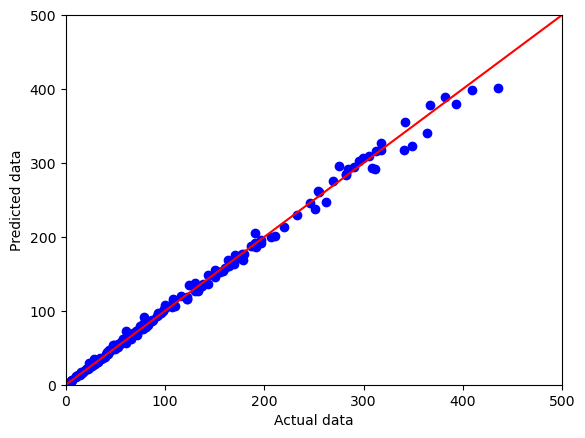

In [11]:
plt.scatter(y_test, y_pred, color="blue")
plt.plot ([0,500],[0,500], color = "red")
plt.axis ([0,500,0,500])
plt.xlabel ('Actual data')
plt.ylabel ('Predicted data')

## Error percentage visualization

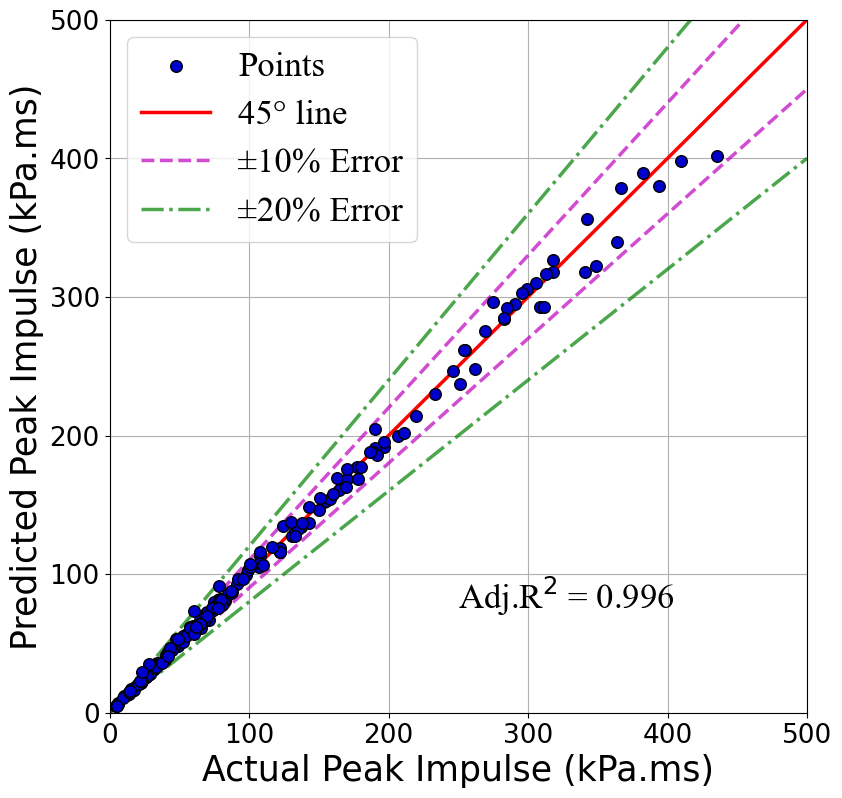

In [12]:
from sklearn.metrics import r2_score
# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Set the font to New Times Roman for all elements
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']


# Add scatterplot
ax.scatter(y_test, y_pred, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')


plt.ylabel('Predicted Peak Impulse (kPa.ms)',fontsize = 25)
plt.xlabel('Actual Peak Impulse (kPa.ms)',fontsize = 25)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)


# Plot regression line
# ax.plot(xseq, a + b * xseq, color="Red", lw=2.5,label='X=Y',alpha=1);


x1 = np.linspace(0,500)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)
plt.plot(x1, 1.1*x1, '--m', label='\u00B110% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.9*x1,'m', linestyle='--',lw=2.5,alpha=0.7)
plt.plot(x1, 1.2*x1, '-.g', label='\u00B120% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.8*x1,'-.g',lw=2.5,alpha=0.7)

plt.ylim(0, 500)
plt.xlim(0, 500)
plt.legend(loc='upper left',fontsize = 25)

plt.grid()

ax.spines['left'].set_color('black')        # setting up Y-axis tick color to red
ax.spines['bottom'].set_color('black')         #setting up above X-axis tick color to red



#ax.annotate("$R^2$ = {:.3f}".format(r2_score(y_test, y_pred)), (250, 100),fontsize = 25)  #Model is called here
ax.annotate("Adj.R$^2$ = {:.3f}".format(adj_r2), (250, 75),fontsize = 25)

plt.savefig('Images/plotR1.png', dpi = 600, bbox_inches = 'tight')

In [13]:
count1 = 0
for i in range(len(y_pred)):
    line1 = y_pred[i] - 0.9*y_test[i]
    line2 = y_pred[i] - 1.1*y_test[i]
    #print ('line 1 ', line1)
    #print ('line 2 ', line2)
    mask1 = (line1 > 0) & (line2 < 0)
    #print (mask)
    count1 = np.sum(mask1+count1)
    #print (count)

count2 = 0
for j in range(len(y_pred)):
    line3 = y_pred[j] - 0.8*y_test[j]
    line4 = y_pred[j] - 1.2*y_test[j]
    mask2 = (line3 > 0) & (line4 < 0)
    count2 = np.sum(mask2+count2)
   

print ('Within 10% margin', format((count1/len (y_pred)),'.2%'))
print ('Within 20% margin', format((count2/len (y_pred)),'.2%'))

Within 10% margin 96.61%
Within 20% margin 98.31%


## <100 kPa

## Save the model to disk

In [ ]:
import pickle
filename = 'finalized_model_RF.sav'
pickle.dump(regressor, open(filename, 'wb'))

## Make new predictions

In [ ]:
%%timeit -r 1 -n 1
comp_data = pd.read_excel('ForPaperComparison.xlsx')
print (comp_data)
comp_data_pred = regressor.predict(comp_data)
print (comp_data_pred)

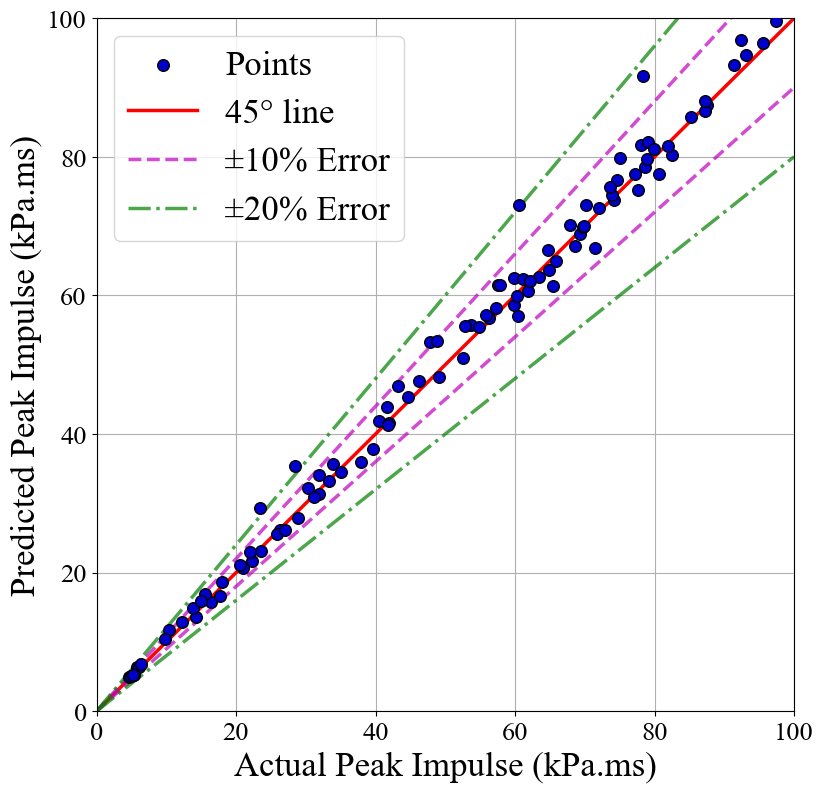

In [14]:
from sklearn.metrics import r2_score
# Initialize layout
fig1, bx = plt.subplots(figsize = (9, 9))


# Add scatterplot
bx.scatter(y_test, y_pred, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
# b, a = np.polyfit(x, y, deg=1)

# Create sequence of 50 numbers from 0 to 5 
#xseq = np.linspace(0, 5)



plt.ylabel('Predicted Peak Impulse (kPa.ms)',fontsize = 25)
plt.xlabel('Actual Peak Impulse (kPa.ms)',fontsize = 25)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)


# Plot regression line
# ax.plot(xseq, a + b * xseq, color="Red", lw=2.5,label='X=Y',alpha=1);


x1 = np.linspace(0,100)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)
plt.plot(x1, 1.1*x1, '--m', label='\u00B110% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.9*x1,'m', linestyle='--',lw=2.5,alpha=0.7)
plt.plot(x1, 1.2*x1, '-.g', label='\u00B120% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.8*x1,'-.g',lw=2.5,alpha=0.7)

plt.ylim(0, 100)
plt.xlim(0, 100)
plt.legend(loc='upper left',fontsize = 25)

plt.grid()

bx.spines['left'].set_color('black')        # setting up Y-axis tick color to red
bx.spines['bottom'].set_color('black')         #setting up above X-axis tick color to red

plt.savefig('Images/plotR2.png', dpi = 600, bbox_inches = 'tight')